In [6]:
# import craft functions
from craft_text_detector import (
    read_image,
    load_craftnet_model,
    load_refinenet_model,
    get_prediction
)

import matplotlib.pyplot as plt
import cv2
import numpy as np
from typing import Dict
from PIL import Image
from pathlib import Path

In [7]:
# load models
refine_net = load_refinenet_model(cuda=False)
craft_net = load_craftnet_model(cuda=False)

/home/sge/Documents/Sergio's OV [Debian]/Esade MiBA/TFM/albcovis-project/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sge/Documents/Sergio's OV [Debian]/Esade MiBA/TFM/albcovis-project/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [8]:
def plot_craft_detections(img_path: str, result: Dict, show=True, save_path=None):
    """
    Plot detected text boxes on the original image.

    Args:
        result (dict): Output from `get_prediction()`
        show (bool): Whether to display the plot
        save_path (str): If provided, saves the result to this path
    """
    image = Image.open(img_path)
    image = np.array(image)
    boxes = result["boxes"]

    img_copy = image.copy()
    for box in boxes:
        box = box.astype(np.int32).reshape((-1, 1, 2))
        cv2.polylines(img_copy, [box], isClosed=True, color=(0, 255, 0), thickness=2)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
    plt.title("CRAFT: Detected Text Regions")
    plt.axis("off")

    if save_path:
        plt.savefig(save_path, bbox_inches="tight")
    if show:
        plt.show()


def plot_craft_with_heatmap(img_path: str, result: Dict, heatmap_type="text_score_heatmap", alpha=0.4, show=True, save_path=None):
    """
    Plot text detections with heatmap overlaid on the original image.

    Args:
        result (dict): Output from `get_prediction()`
        heatmap_type (str): 'text_score_heatmap' or 'link_score_heatmap'
        alpha (float): Transparency of heatmap overlay
        show (bool): Whether to display the plot
        save_path (str): If provided, saves the result to this path
    """
    image = Image.open(img_path)
    image = np.array(image)
    boxes = result["boxes"]
    heatmap = result["heatmaps"][heatmap_type]

    heatmap_resized = cv2.resize(heatmap, (image.shape[1], image.shape[0]))

    overlay = cv2.addWeighted(image, 1 - alpha, heatmap_resized, alpha, 0)

    # Draw boxes
    for box in boxes:
        box = box.astype(np.int32).reshape((-1, 1, 2))
        cv2.polylines(overlay, [box], isClosed=True, color=(0, 255, 0), thickness=2)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.title(f"CRAFT Detection with {heatmap_type}")
    plt.axis("off")

    if save_path:
        plt.savefig(save_path, bbox_inches="tight")
    if show:
        plt.show()


In [9]:
# set image path and export folder directory
img_path = '../data/source/images/1497325512-large.jpg' # can be filepath, PIL image or numpy array

# read image
image = read_image(img_path)

# perform prediction
prediction_result = get_prediction(
    image=image,
    craft_net=craft_net,
    refine_net=refine_net,
    text_threshold=0.7,
    link_threshold=0.4,
    low_text=0.4,
    cuda=False,
    long_size=500
)

prediction_result

{'boxes': array([[[ 58.,  12.],
         [432.,  12.],
         [432.,  30.],
         [ 58.,  30.]]], dtype=float32),
 'boxes_as_ratios': array([[[0.116, 0.024],
         [0.864, 0.024],
         [0.864, 0.06 ],
         [0.116, 0.06 ]]]),
 'polys': array([array([[ 58.,  12.],
               [432.,  12.],
               [432.,  30.],
               [ 58.,  30.]], dtype=float32)], dtype=object),
 'polys_as_ratios': array([[[0.116, 0.024],
         [0.864, 0.024],
         [0.864, 0.06 ],
         [0.116, 0.06 ]]]),
 'heatmaps': {'text_score_heatmap': array([[[140,   0,   0],
          [144,   0,   0],
          [128,   0,   0],
          ...,
          [128,   0,   0],
          [136,   0,   0],
          [128,   0,   0]],
  
         [[132,   0,   0],
          [128,   0,   0],
          [128,   0,   0],
          ...,
          [128,   0,   0],
          [136,   0,   0],
          [128,   0,   0]],
  
         [[128,   0,   0],
          [136,   0,   0],
          [128,   0,   0],
  

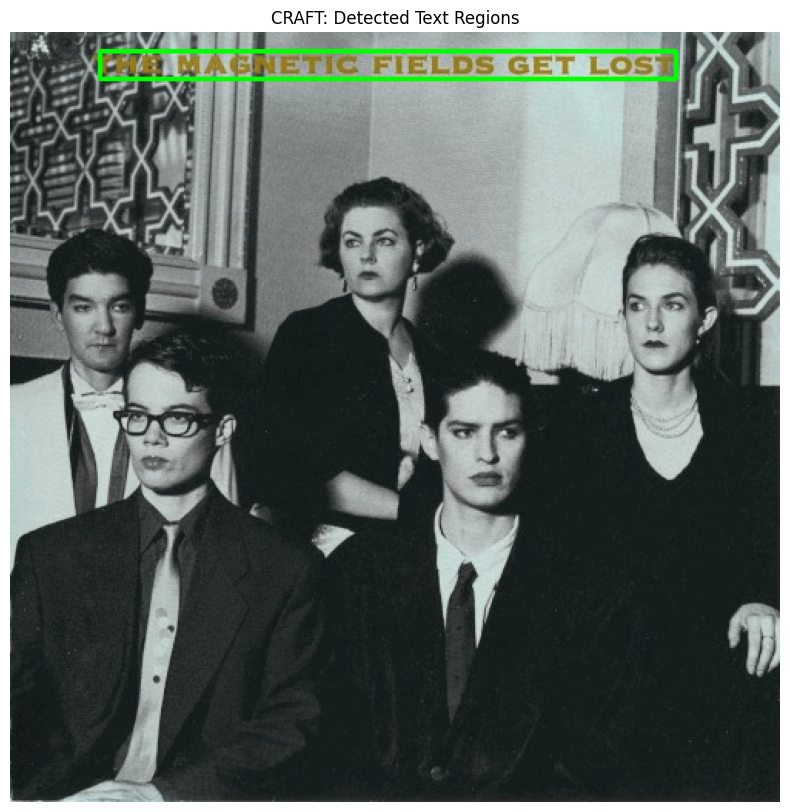

In [10]:
plot_craft_detections(img_path, prediction_result)

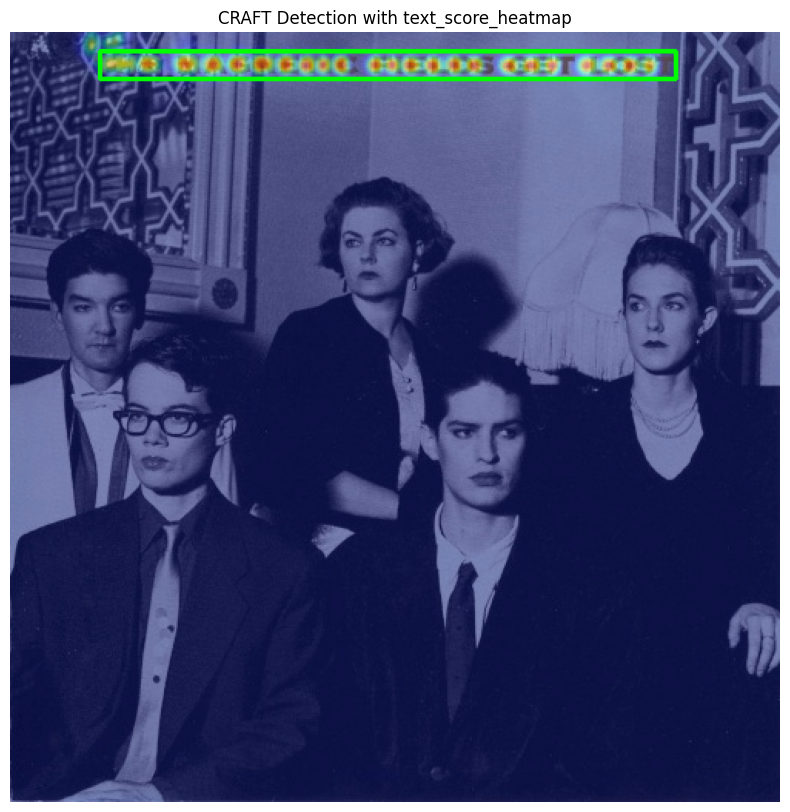

In [11]:
plot_craft_with_heatmap(img_path, prediction_result)

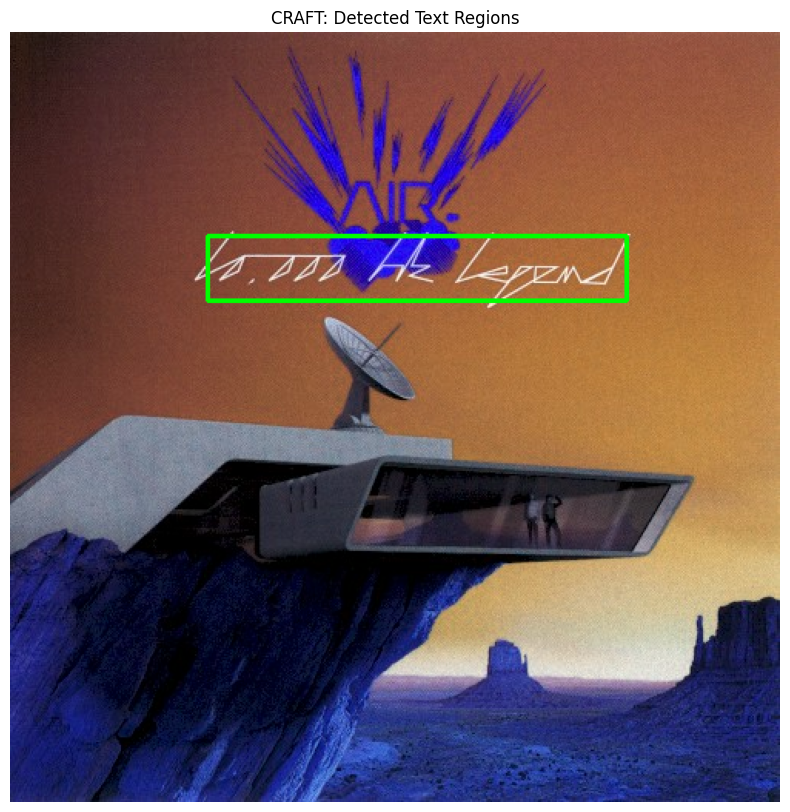

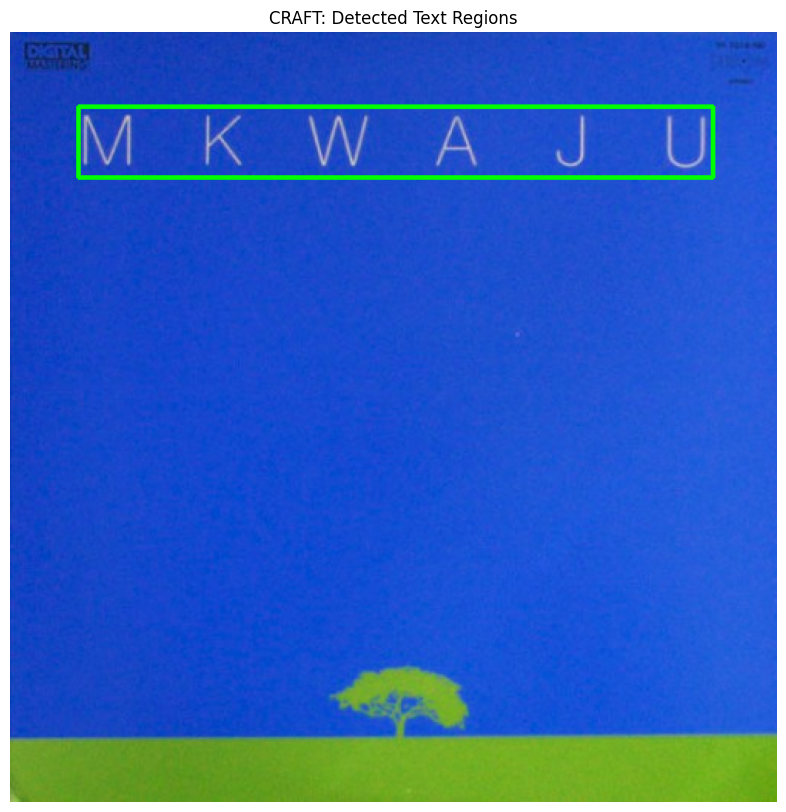

In [13]:
dir = Path("../data/source/images")
imgs_filenames = [
    "40654268451-px_500.jpg", # 10000Hz Legend
    "14688551481-large.jpg", # MKWAJU
    "9845751214-large.jpg", # Gotan Project
    "22280981189-px_500.jpg", # Dick's Picks Volume Four
    "11446625684-large.jpg", # Carnaval
    "24818281700-px_500.jpg", # Tiger Army Retrofuture
    "39341710398-px_500.jpg", # Xerrox
    "3880053972-px_500.jpg", # Unknown Pleasures
    "24961543145-px_500.jpg", # Hats
    "23776122656-px_500.jpg", # Tre
    "1766939079-large.jpg", # Richest man in babylon
    "17519297659-px_500.jpg", # Amor amarillo
    "4924862361-large.jpg", # The White Album
    "30944412549-px_500.jpg" # Donda
    ]

for filename in imgs_filenames[:2]:
    path = dir / filename
    image = Image.open(path)
    image = np.array(image)
    # image = read_image(str(path))

    # perform prediction
    prediction_result = get_prediction(
        image=image,
        craft_net=craft_net,
        refine_net=refine_net,
        text_threshold=0.7,
        link_threshold=0.1, #0.4
        low_text=0.4,
        cuda=False,
        long_size=500
    )

    plot_craft_detections(path, prediction_result)

In [4]:
import pandas as pd

df = pd.read_csv("../data/processed/craft_grid/metrics_summary.csv")
main_metric_col_idx = 2
main_metric_col_name = df.columns[main_metric_col_idx]
df.sort_values(main_metric_col_name, ascending=False)

,config,mean_time,AP@[IoU=0.10:0.95],AP@0.50,AP@0.75,AP_small,AP_medium,AP_large,AR@1,AR@10,AR@100,AR_small,AR_medium,AR_large
6,text=0.9_link=0.2_low=0.4_size=1280,NaN,0.338599,0.404670,-1.0,0.177362,0.444372,0.413386,0.136806,0.379266,0.384425,0.197865,0.496671,0.485185
15,text=0.7_link=0.2_low=0.4_size=1280,NaN,0.330451,0.392848,-1.0,0.169828,0.439162,0.408438,0.132143,0.397817,0.402976,0.224138,0.505826,0.514198
3,text=0.9_link=0.4_low=0.4_size=1280,NaN,0.306869,0.365713,-1.0,0.123772,0.426619,0.379836,0.130357,0.355159,0.360317,0.151615,0.496671,0.435185
24,text=0.5_link=0.2_low=0.4_size=1280,NaN,0.305112,0.360459,-1.0,0.140271,0.415709,0.408438,0.123214,0.399504,0.404663,0.231801,0.503537,0.514198
0,text=0.9_link=0.6_low=0.4_size=1280,NaN,0.300455,0.351174,-1.0,0.128225,0.410810,0.387073,0.128373,0.360020,0.366865,0.159004,0.507074,0.424074
12,text=0.7_link=0.4_low=0.4_size=1280,NaN,0.286477,0.339460,-1.0,0.107560,0.398617,0.382834,0.119345,0.360020,0.365179,0.162835,0.491885,0.454321
16,text=0.7_link=0.2_low=0.4_size=800,NaN,0.282449,0.328106,-1.0,0.122144,0.371206,0.410169,0.121825,0.324702,0.326290,0.150520,0.409904,0.484568
9,text=0.7_link=0.6_low=0.4_size=1280,NaN,0.279991,0.324549,-1.0,0.110455,0.388072,0.394778,0.119841,0.366171,0.374504,0.174877,0.505202,0.441358
7,text=0.9_link=0.2_low=0.4_size=800,NaN,0.277439,0.332477,-1.0,0.104477,0.369895,0.403479,0.124405,0.302183,0.303770,0.110016,0.397836,0.470370
13,text=0.7_link=0.4_low=0.4_size=800,NaN,0.273484,0.322104,-1.0,0.111017,0.363388,0.392211,0.119147,0.312302,0.315079,0.133552,0.406783,0.461728
